In [ ]:
!pip install supervision ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 752.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO('/content/sample_data/yolov8x.pt')
image = cv2.imread('/content/sample_data/maxresdefault (1).jpg')
result = model(image)[0]
detections = sv.Detections.from_ultralytics(result)


0: 384x640 15 cars, 1 bus, 1 truck, 2920.7ms
Speed: 15.9ms preprocess, 2920.7ms inference, 33.6ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annot = sv.LabelAnnotator()

labels = [model.model.names[class_id] for class_id in detections.class_id]
annot_image = bounding_box_annotator.annotate(scene=image,detections=detections)
annot_image = label_annot.annotate(scene=annot_image, detections=detections, labels=labels)

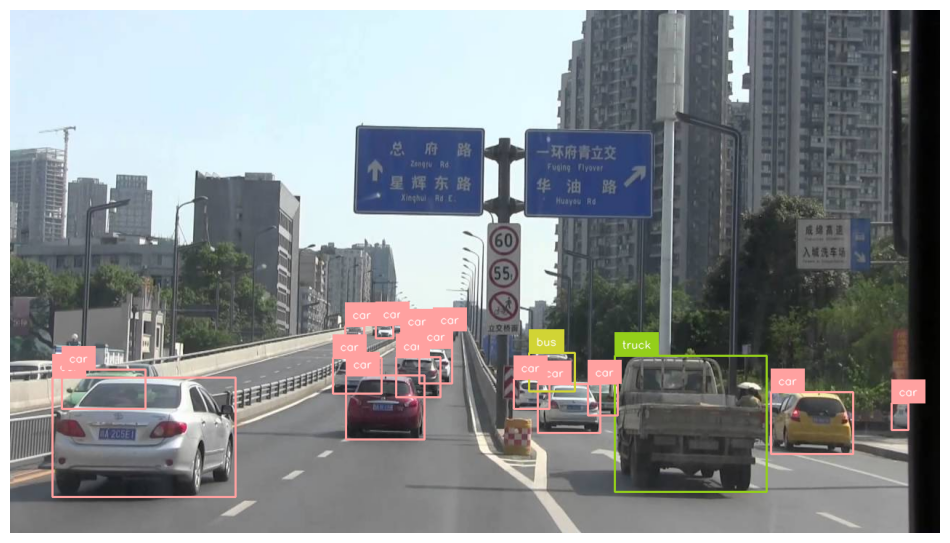

In [ ]:
sv.plot_image(annot_image)

In [ ]:
from supervision.assets import download_assets, VideoAssets

download_assets(VideoAssets.VEHICLES)

  0%|          | 0/35345757 [00:00<?, ?it/s]

'vehicles.mp4'

In [ ]:
import numpy as np

model = YOLO("/content/sample_data/yolov8x.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(detections.class_id, detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    return label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)

sv.process_video(
    source_path="vehicles.mp4",
    target_path="result.mp4",
    callback=callback
)


0: 384x640 3 cars, 1 truck, 2746.2ms
Speed: 4.0ms preprocess, 2746.2ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 2722.6ms
Speed: 5.7ms preprocess, 2722.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 2 trucks, 3104.1ms
Speed: 4.2ms preprocess, 3104.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 3267.2ms
Speed: 3.9ms preprocess, 3267.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 2695.3ms
Speed: 4.0ms preprocess, 2695.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 2744.8ms
Speed: 6.7ms preprocess, 2744.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 2964.8ms
Speed: 5.2ms preprocess, 2964.8ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 3396.1ms
Sp